In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/My Drive/Mall_Customers.csv'
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA & PREPROCESSING

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


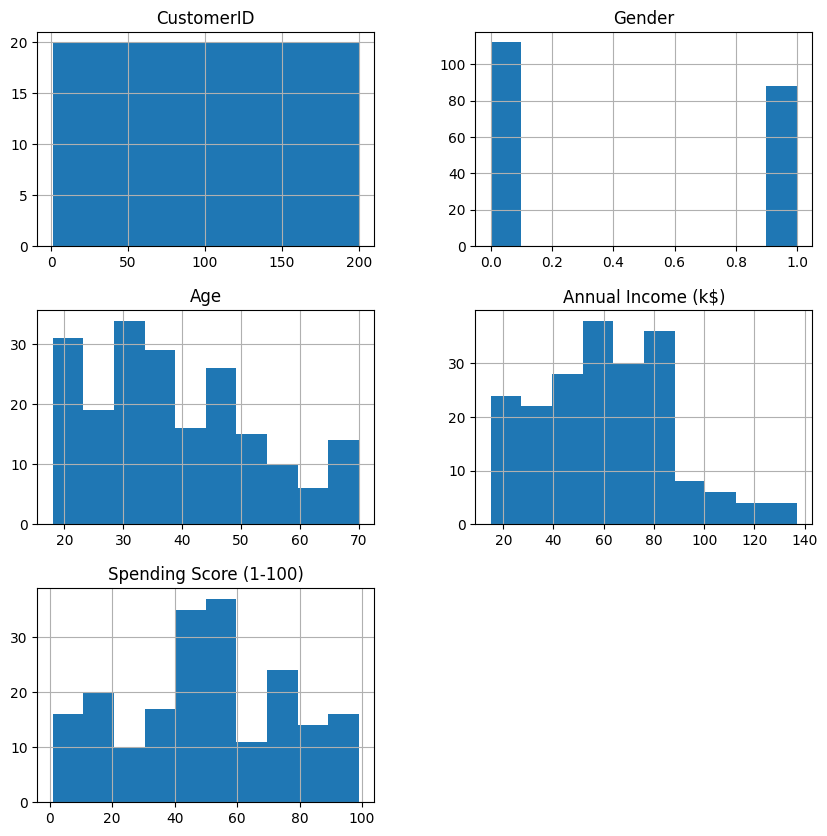

In [ ]:
# Convert categorical variable into numeric binary format
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Visualize distributions of all numeric features using histograms
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
# Remove 'CustomerID' column (no analytical value for clustering)
df.drop('CustomerID' , axis=1, inplace=True)

# K-MEANS CLUSTERING

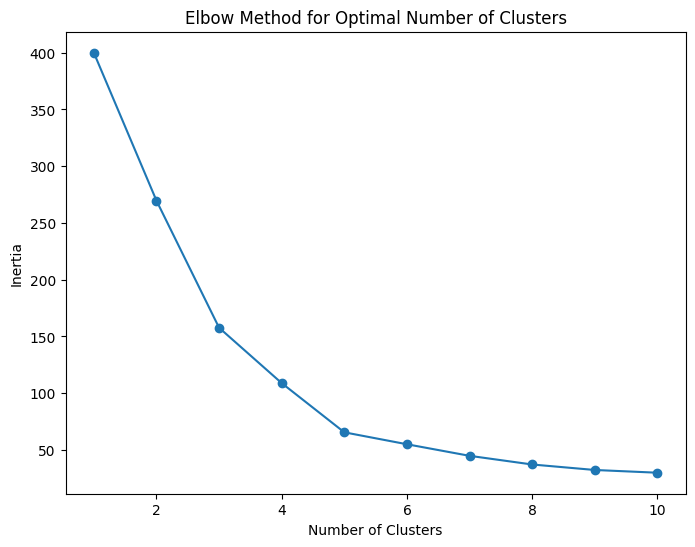

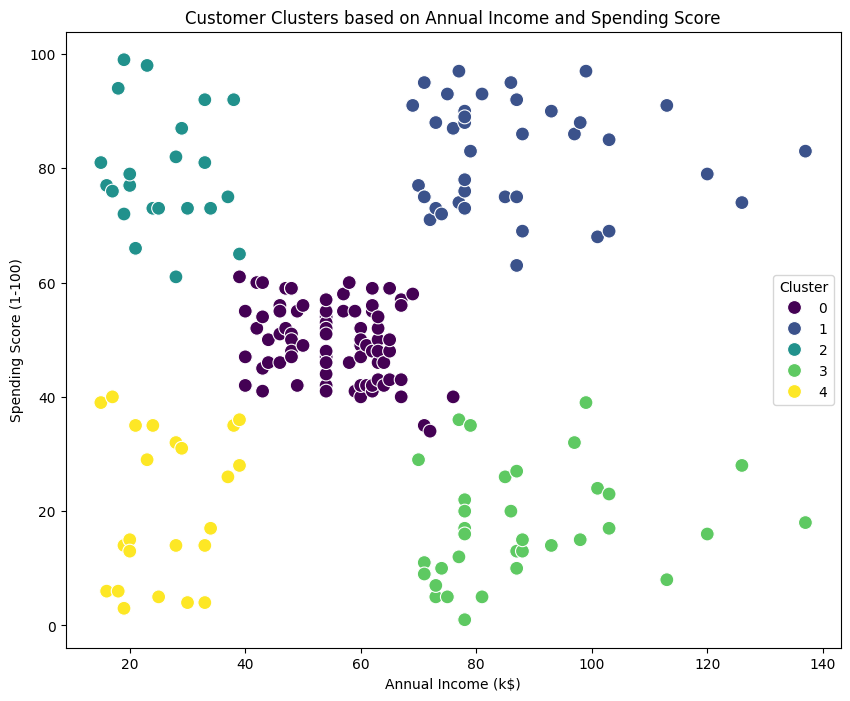

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the most relevant features for customer segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features to ensure equal weighting in distance-based clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow method, choose a number of clusters (k=5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# EVALUATE K-MEANS CLUSTER QUALITY

In [ ]:
# Silhouette Score measures how similar an object is to its own cluster compared to others
from sklearn.metrics import silhouette_score
score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.553931997444648


In [ ]:
# Analyze average spending per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# APPLY DBSCAN FOR COMPARISON (Density-Based Clustering)

DBSCAN_Cluster
 2    96
 3    31
 4    23
-1    23
 0    15
 1    12
Name: count, dtype: int64


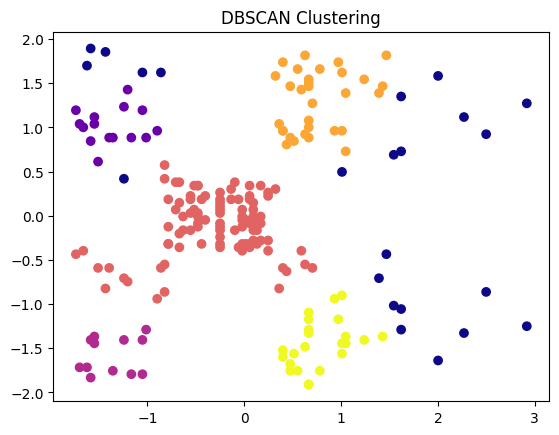

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.38, min_samples=7)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(df['DBSCAN_Cluster'].value_counts())

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

# EVALUATE DBSCAN CLUSTER QUALITY

In [ ]:
# Evaluate cluster quality
from sklearn.metrics import silhouette_score
score = silhouette_score(X, df['DBSCAN_Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.421396997554767


In [ ]:
# Analyze average spending per cluster
cluster_summary = df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       89.043478               58.826087
 0                       24.533333               76.333333
 1                       24.583333                9.583333
 2                       52.645833               47.312500
 3                       80.161290               83.580645
 4                       80.956522               12.782609
